<a href="https://colab.research.google.com/github/mozhgans/courses/blob/main/course_udemy_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

linear regression:

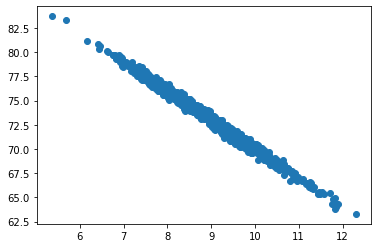

In [5]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(9.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

scatter(pageSpeeds, purchaseAmount)

As we only have two features, we can keep it simple and just use scipy.state.linregress:

In [6]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


Not surprisngly, our R-squared value shows a really good fit:

In [7]:
r_value ** 2

0.9897238632934047

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

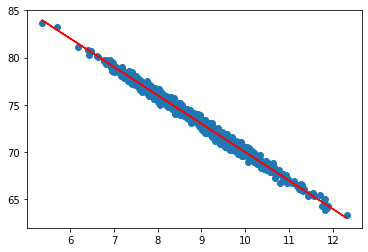

In [8]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

Polynomial regression:

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

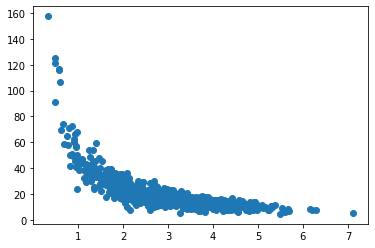

In [9]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [24]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

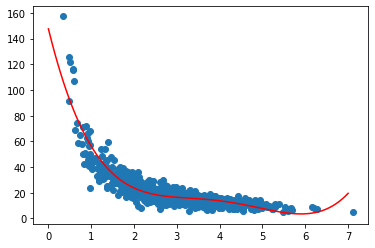

In [25]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


Multiple Regression: Let's grab a small little data set of Blue Book car values:

In [27]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


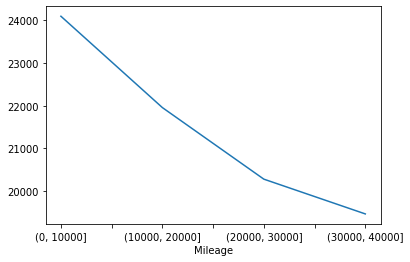

In [28]:
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups.head())
groups['Price'].plot.line()

We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [29]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

print (X)

est = sm.OLS(y, X).fit()

est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    2.23e-11
Time:                        20:52:42   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table of coefficients above gives us the values to plug into an equation of form: B0 + B1 * Mileage + B2 * cylinders + B3 * doors

In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [30]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [31]:
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]
